<a href="https://colab.research.google.com/github/jean2098/ie-trends-activity-synch-class/blob/main/trend_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**data** **preparation**

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

**data** **cleaning**

In [140]:
naia_df= pd.read_excel("NAIA Daily 2017.xlsx")
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION
0,NaN,NaN,NaN,mm,°C,°C,°C,m/s,degrees
1,2017.0,1.0,1.0,0,31.931,23.6,27.7655,3,80
2,2017.0,1.0,2.0,0,31,24.6,27.8,2,70
3,2017.0,1.0,3.0,0,32.5,25.2,28.85,3,80
4,2017.0,1.0,4.0,T,NaN,24.2,NaN,2,100
...,...,...,...,...,...,...,...,...,...
361,2017.0,12.0,27.0,1.5,28.3,24.6,26.45,2,70
362,2017.0,12.0,28.0,0,31.2,24.7,27.95,3,70
363,2017.0,12.0,29.0,0,29.6,23.7,26.65,3,70
364,2017.0,12.0,30.0,0,29.5,22.8,26.15,3,70


In [141]:
###dropping rows

naia_df=naia_df.drop(index=0)

In [142]:
### NaN value
naia_df.isna().sum()

YEAR               0
MONTH              0
DAY                0
RAINFALL           0
TMAX              11
TMIN               8
TMEAN             45
WIND SPEED         0
WIND DIRECTION     0
dtype: int64

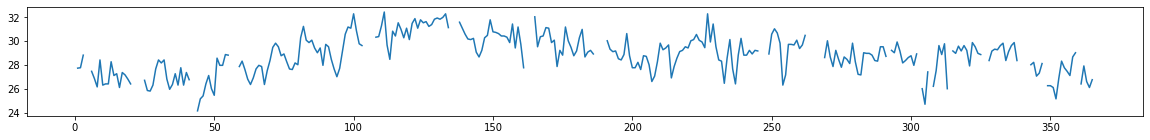

In [143]:
## Exploring data
plt.figure(figsize=(20,2))
naia_df['TMEAN'].plot()


In [144]:
## connect the dots
naia_df['TMEAN'] = naia_df['TMEAN'].interpolate()
naia_df['TMEAN'] = naia_df['TMIN'].interpolate()
naia_df['TMAX'] = naia_df['TMAX'].interpolate()

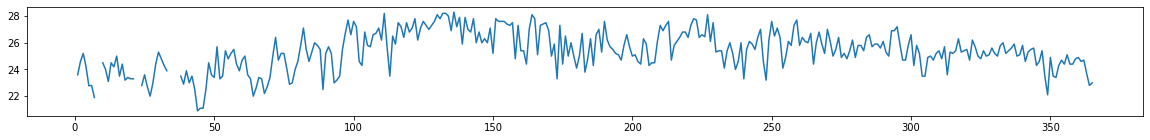

In [145]:
###check data
plt.figure(figsize=(20,2))
naia_df['TMEAN'].plot()



In [157]:
###apply a conversion
def celcius_to_kelvin(temp):
  K = temp+ 273.15
  return K
  celcius_to_kelvin(32)

In [158]:
naia_temps = naia_df[['TMIN','TMAX','TMEAN']]
naia_df[['TMIN','TMAX','TMEAN']] = celsius_to_kelvin(naia_temps)
naia_df

NameError: ignored

In [148]:
naia_df[["YEAR", "MONTH", "DAY"]]=naia_df[["YEAR", "MONTH","DAY"]].astype(int).astype(str)
naia_df[['DATE']]= naia_df[["MONTH", "DAY","YEAR"]].agg('/'.join,axis=1)
naia_df

,YEAR,MONTH,DAY,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION,DATE
1,2017,1,1,0,31.931,23.6,23.6,3,80,1/1/2017
2,2017,1,2,0,31,24.6,24.6,2,70,1/2/2017
3,2017,1,3,0,32.5,25.2,25.2,3,80,1/3/2017
4,2017,1,4,T,NaN,24.2,24.2,2,100,1/4/2017
5,2017,1,5,0.45,NaN,22.78,22.78,2,110,1/5/2017
...,...,...,...,...,...,...,...,...,...,...
361,2017,12,27,1.5,28.3,24.6,24.6,2,70,12/27/2017
362,2017,12,28,0,31.2,24.7,24.7,3,70,12/28/2017
363,2017,12,29,0,29.6,23.7,23.7,3,70,12/29/2017
364,2017,12,30,0,29.5,22.8,22.8,3,70,12/30/2017


In [149]:
naia_df.drop(labels=["MONTH", "DAY","YEAR"],axis=1)

,RAINFALL,TMAX,TMIN,TMEAN,WIND SPEED,WIND DIRECTION,DATE
1,0,31.931,23.6,23.6,3,80,1/1/2017
2,0,31,24.6,24.6,2,70,1/2/2017
3,0,32.5,25.2,25.2,3,80,1/3/2017
4,T,NaN,24.2,24.2,2,100,1/4/2017
5,0.45,NaN,22.78,22.78,2,110,1/5/2017
...,...,...,...,...,...,...,...
361,1.5,28.3,24.6,24.6,2,70,12/27/2017
362,0,31.2,24.7,24.7,3,70,12/28/2017
363,0,29.6,23.7,23.7,3,70,12/29/2017
364,0,29.5,22.8,22.8,3,70,12/30/2017


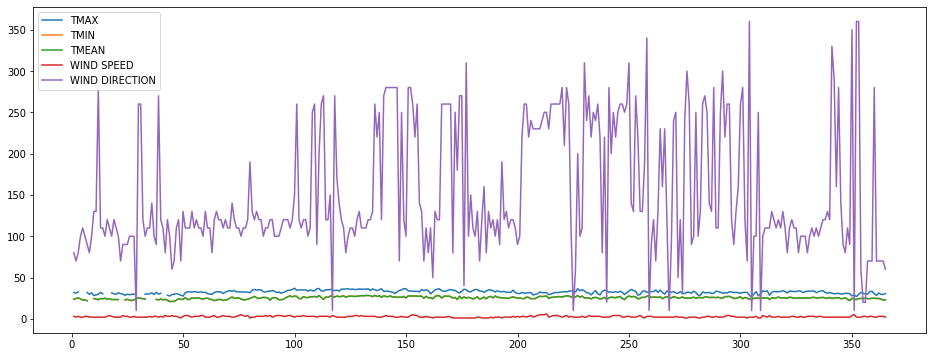

In [154]:
X= naia_df.drop(labels=["DATE"],axis=1)
X.plot(figsize=(16,6))
plt.savefig("naia-weather.jpg",dpi=300)


In [ ]:
## Convert data type
naia_df=naia_df.astype(float)

In [ ]:
naia_df.dtypes

In [ ]:
"""
Cleaning Rules:
T - 0.01
"""

###check datatypes
naia_df['RAINFALL']=naia_df['RAINFALL'].replace({"T":0.01})
naia_df

In [ ]:
##conversion of data again
naia_df=naia_df.astype(float)

In [ ]:
##checking data type again
naia_df.dtypes